In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
iris_df = pd.read_csv('/content/Iris.csv')

In [33]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:
iris_df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
iris_df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [36]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [37]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Iris Exploratory Data Analysis (EDA)

In [38]:
# Removed 'Id' column from dataset
iris_df.drop('Id', axis=1, inplace=True)

In [39]:
# Checks the null values per each column
iris_df.isna().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [40]:
# Find the duplicated values
iris_df.duplicated().sum()

3

In [41]:
# Drop them
iris_df.drop_duplicates(inplace=True)

In [42]:
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [43]:
# Rename the columns
iris_df = iris_df.rename(columns={'SepalLengthCm':'Sepal_Length (cm)','SepalWidthCm':'Sepal_Width (cm)',
                        'PetalLengthCm':'Petal_Length (cm)','PetalWidthCm':'Petal_Width (cm)'})

In [44]:
iris_df.nunique()

,0
Sepal_Length (cm),35
Sepal_Width (cm),23
Petal_Length (cm),43
Petal_Width (cm),22
Species,3


In [45]:
# Check whether data is imbalanced or not
iris_df['Species'].value_counts()

,count
Species,
Iris-versicolor,50
Iris-virginica,49
Iris-setosa,48


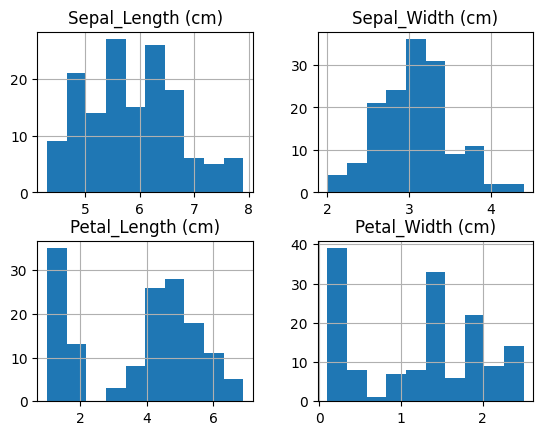

In [46]:
iris_df.hist();

In [47]:
colors_map = {'Iris-setosa':'blue','Iris-versicolor':'green','Iris-virginica':'purple'}
colors = iris_df['Species'].map(colors_map)

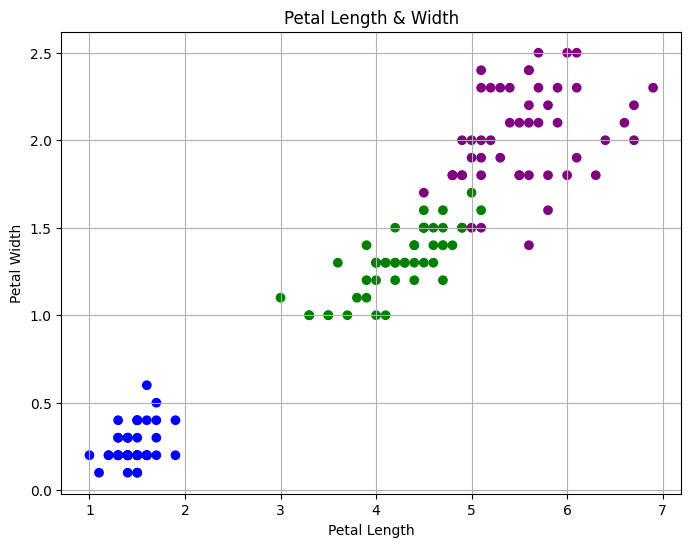

In [48]:
plt.figure(figsize=(8, 6))
plt.scatter(x=iris_df['Petal_Length (cm)'], y=iris_df['Petal_Width (cm)'],
            c=colors, label=iris_df['Species'])
plt.title('Petal Length & Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.grid()
plt.show();

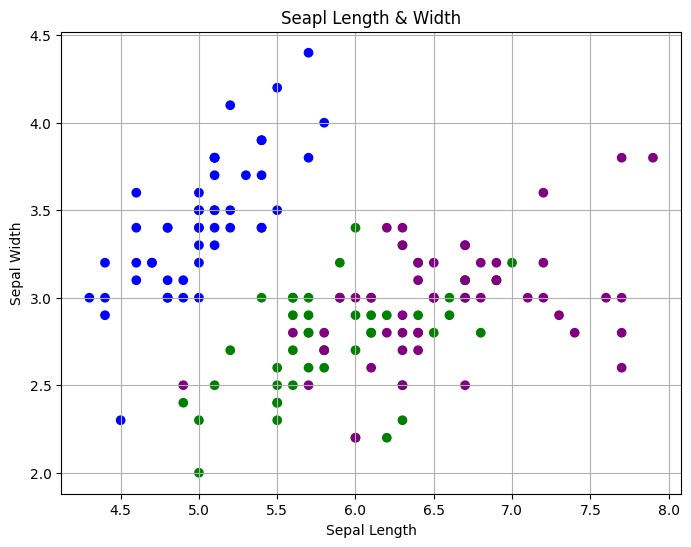

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(x=iris_df['Sepal_Length (cm)'],y=iris_df['Sepal_Width (cm)'],
            c=colors, label=iris_df['Species'])
plt.title('Seapl Length & Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid()
plt.show();

# Machine Learning

In [50]:
# target column is 'Species'
X = iris_df.drop('Species', axis=1)
y = iris_df['Species'].copy()

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Apply SMOTE analysis technique to balance the dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [53]:
# Recheck what the imbalanced problem being solved
y_resampled.value_counts()

,count
Species,
Iris-virginica,40
Iris-setosa,40
Iris-versicolor,40


# Baseline Model - Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_resampled, y_resampled)

LogisticRegression()

In [57]:
log_reg.score(X_resampled, y_resampled), log_reg.score(X_test, y_test)

(0.9833333333333333, 0.9333333333333333)

In [58]:
y_pred = log_reg.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [59]:
X_new = np.array([[5, 2.9, 1, 0.2]])

y_new_pred = log_reg.predict(X_new)
y_new_pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

#KNN Neighbours

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=3)

In [61]:
knn.score(X_resampled, y_resampled), knn.score(X_test, y_test)

(0.9833333333333333, 0.9333333333333333)

In [62]:
y_pred = knn.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [63]:
y_new_pred = knn.predict(X_new)
y_new_pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

# Support Vector Machine Model

In [64]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_resampled,y_resampled)

SVC()

In [66]:
svm_clf.score(X_resampled,y_resampled), svm_clf.score(X_test, y_test)

(0.9833333333333333, 0.9333333333333333)

In [67]:
y_pred = svm_clf.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [68]:
y_new_pred = svm_clf.predict(X_new)
y_new_pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

# RandomForestClassifier Model

In [73]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_resampled,y_resampled)

RandomForestClassifier(random_state=42)

In [74]:
rfc.score(X_resampled,y_resampled), rfc.score(X_test,y_test)

(1.0, 0.9333333333333333)

In [75]:
y_pred = rfc.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [76]:
y_new_pred = rfc.predict(X_new)
y_new_pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

# Metrics

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [83]:
accuracy_score(y_test, y_pred)

0.9333333333333333

In [84]:
precision_score(y_test, y_pred, average='weighted')

0.9333333333333333

In [85]:
recall_score(y_test, y_pred, average='weighted')

0.9333333333333333

In [86]:
f1_score(y_test, y_pred, average='weighted')

0.9333333333333333

In [87]:
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]])

# Correlation Matrix

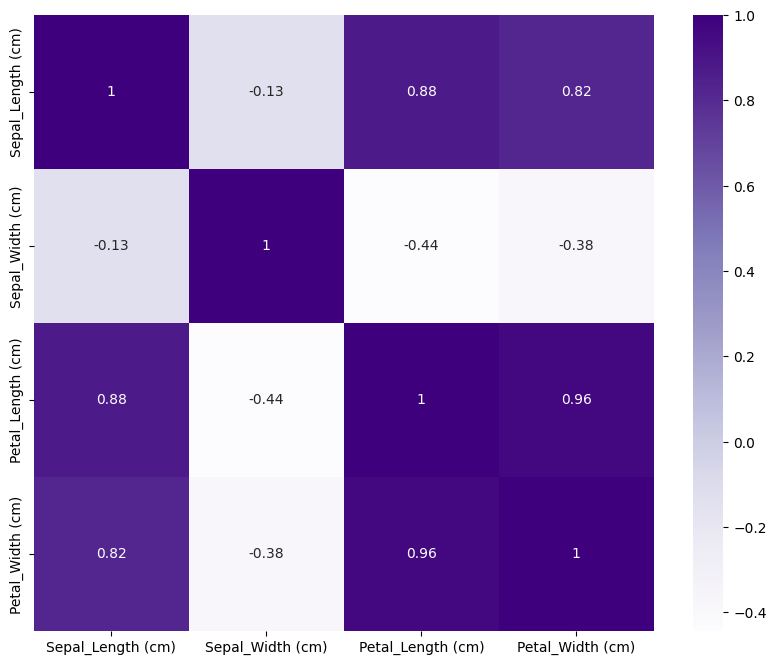

In [88]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(X_resampled.select_dtypes(include=[np.number]).corr(), annot=True, cmap='Purples')
plt.show();